In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"housing.csv")
df

id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

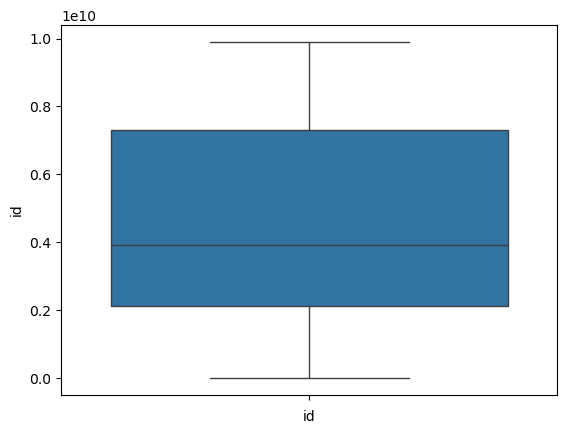

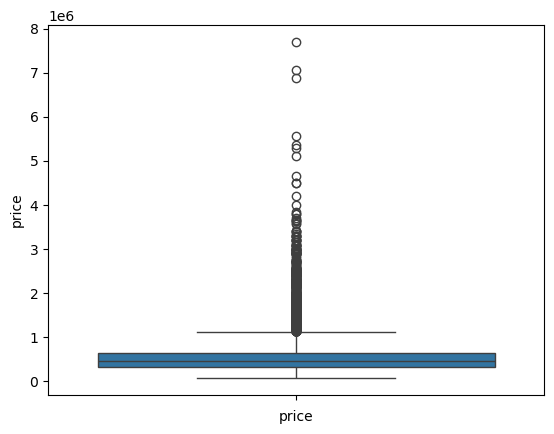

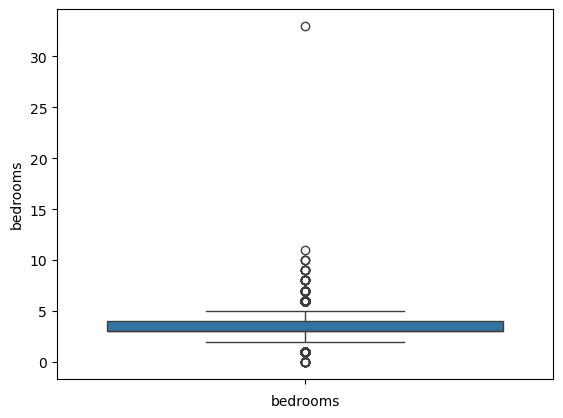

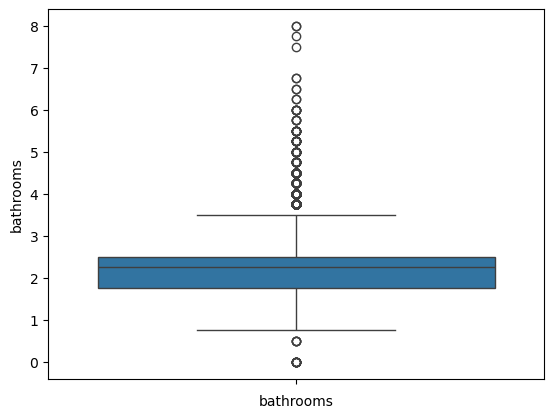

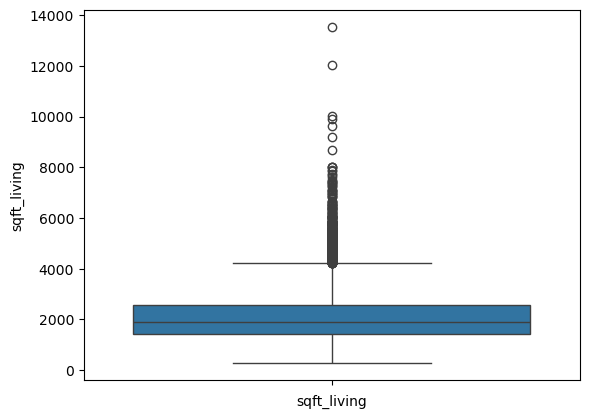

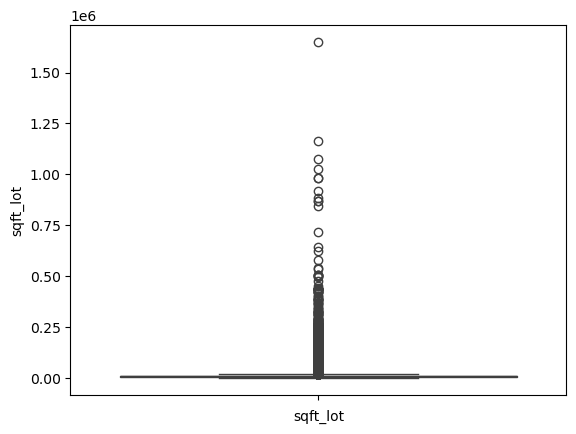

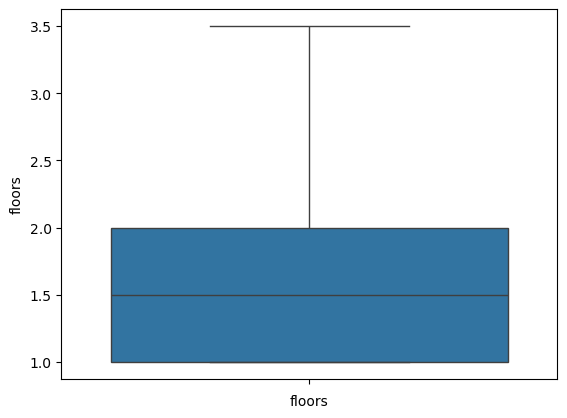

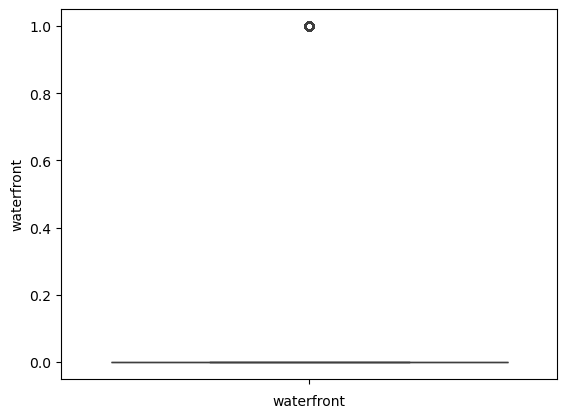

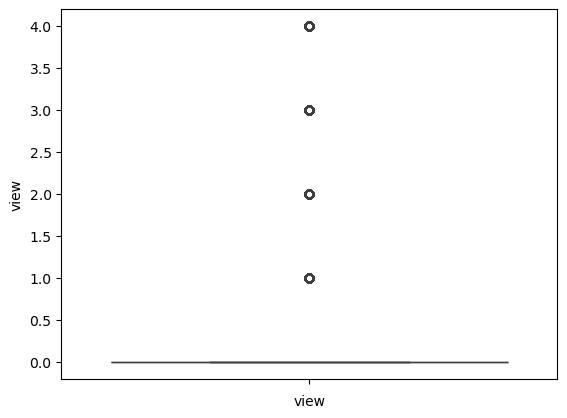

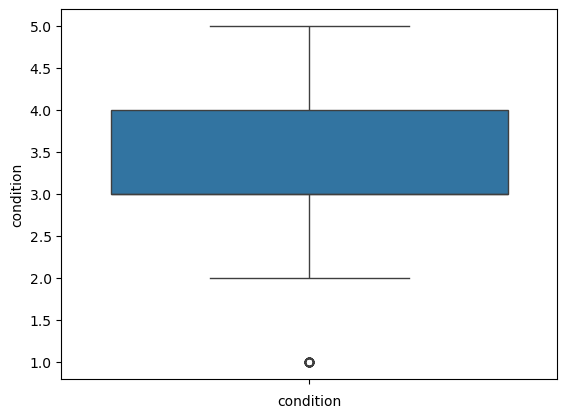

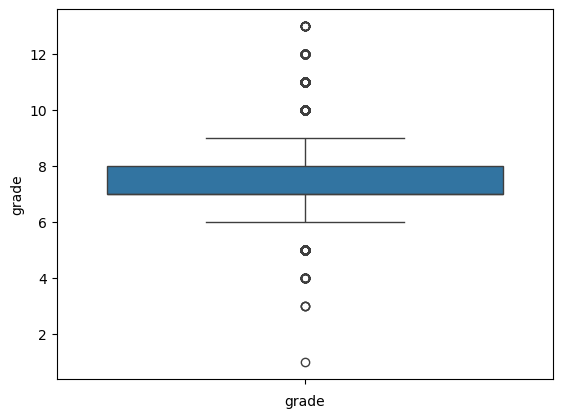

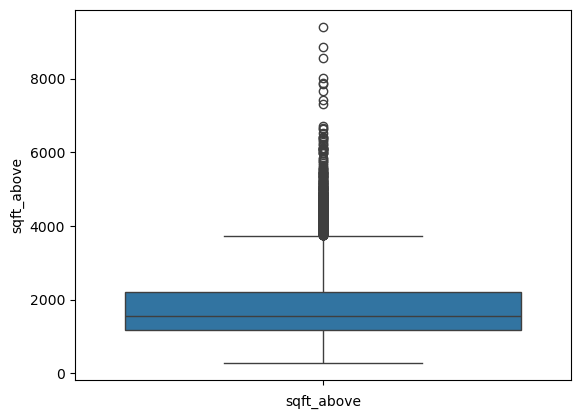

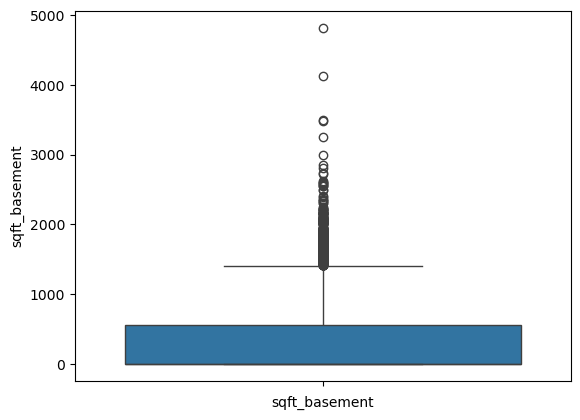

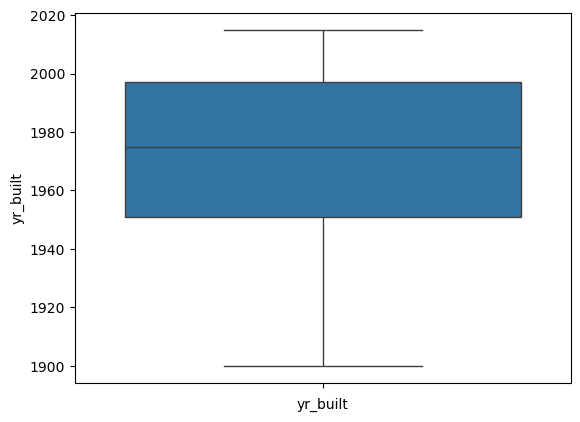

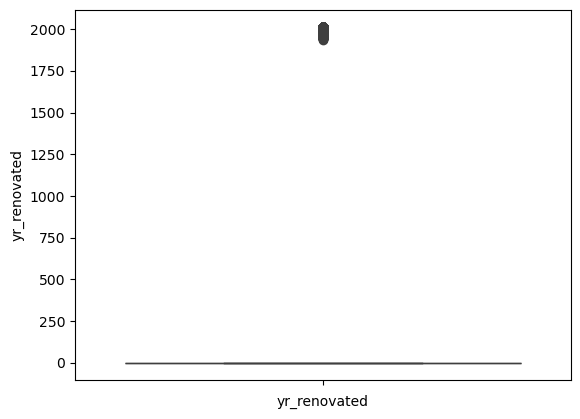

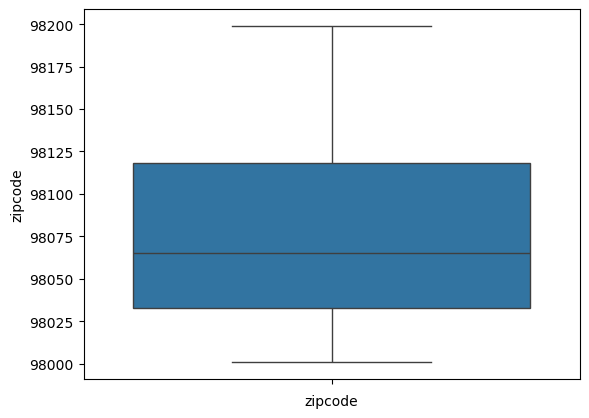

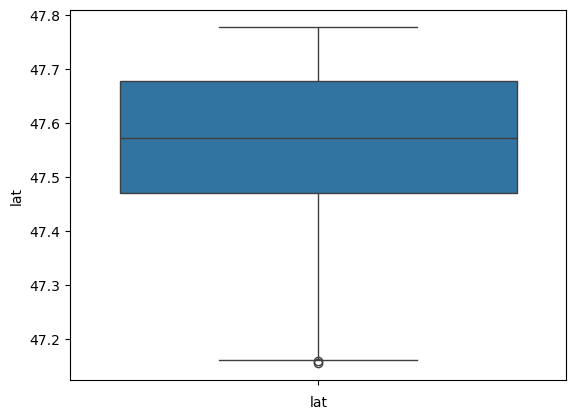

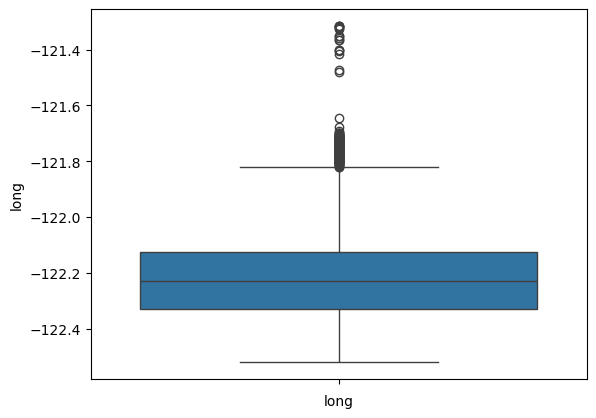

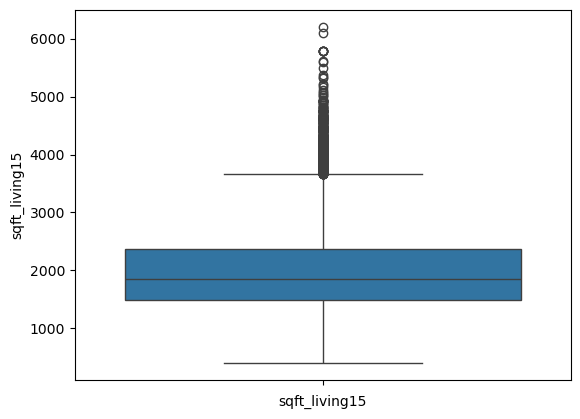

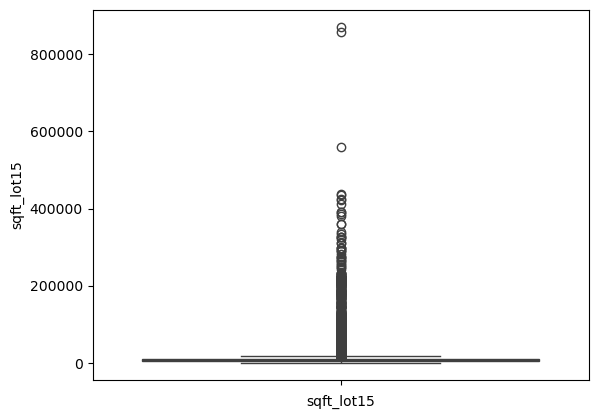

In [7]:
#CHECKING FOR OUTLIARS
for x in df.columns:
    if df[x].dtypes!="object":
        sns.boxplot(df[x])
        plt.xlabel(x)
        plt.show()

In [27]:
#REMOVING OUTLIARS
for x in df.columns:
  if df[x].dtypes=='object':
    continue

  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  IQR = Q3-Q1   # Inter Quartile Range.
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df = df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]
  

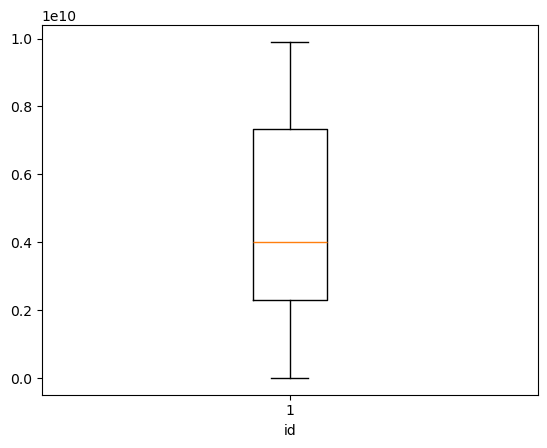

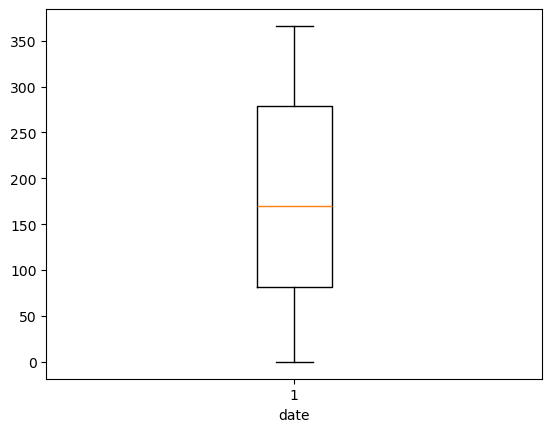

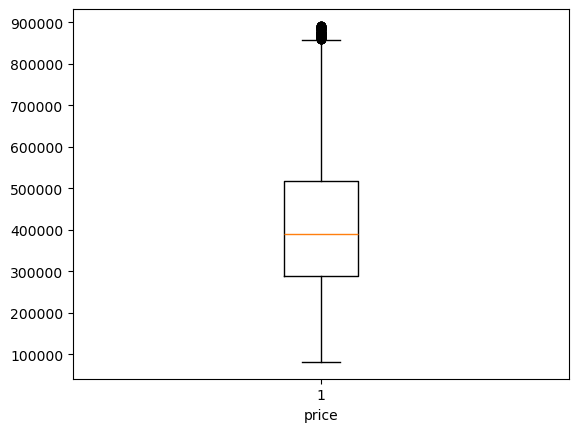

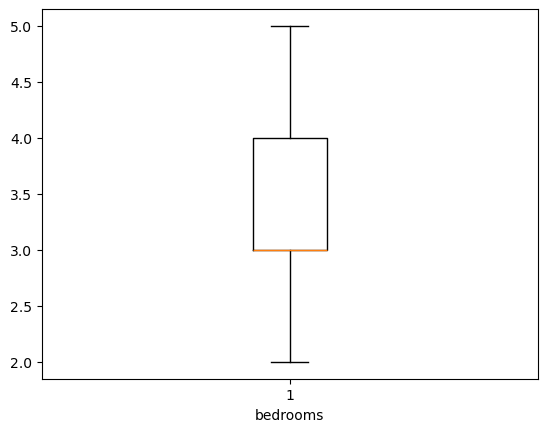

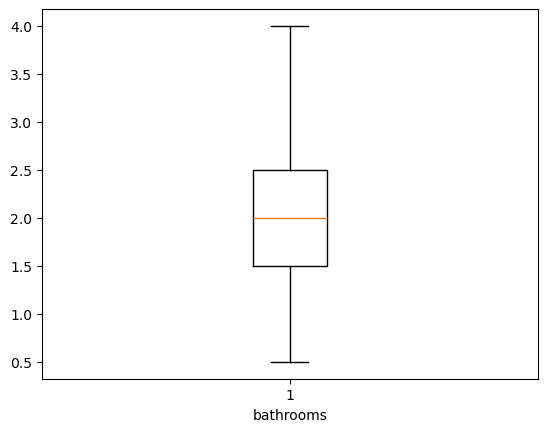

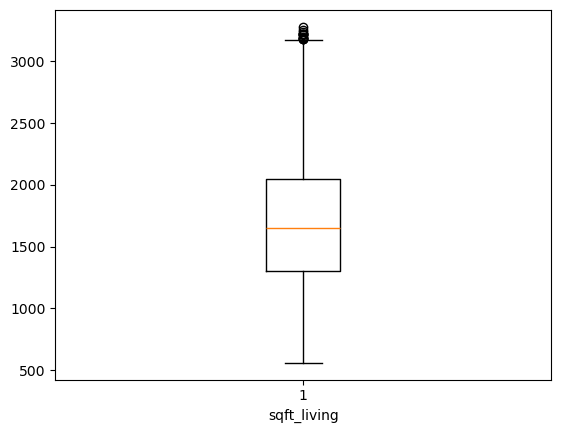

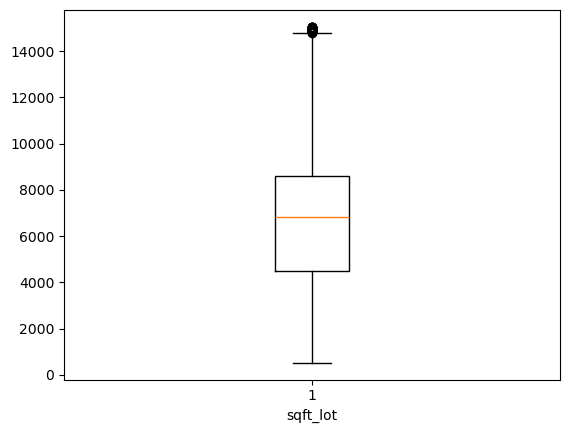

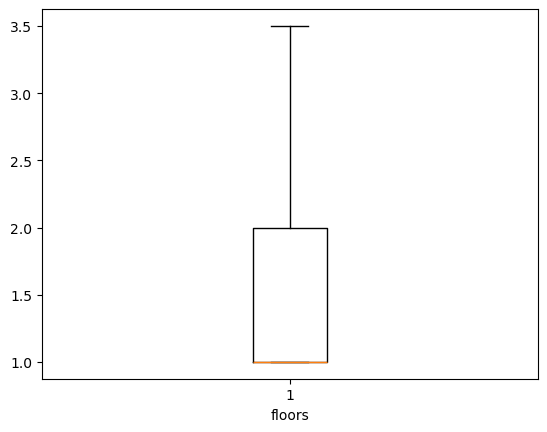

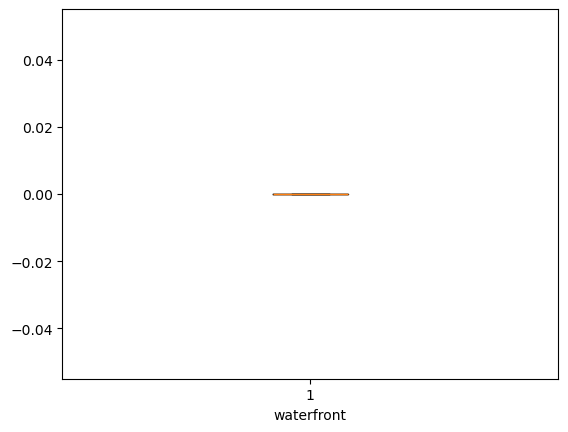

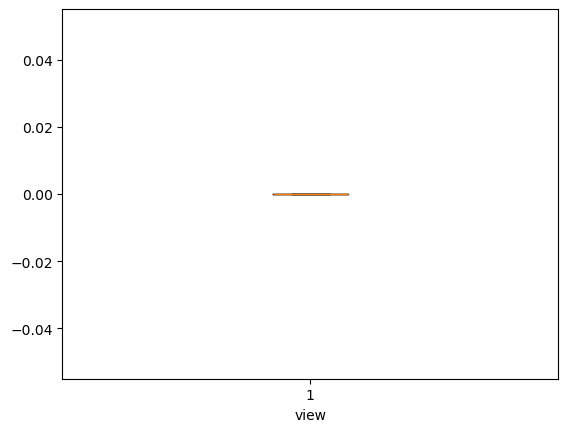

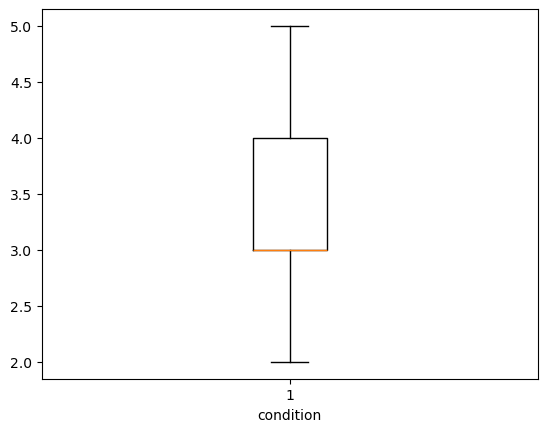

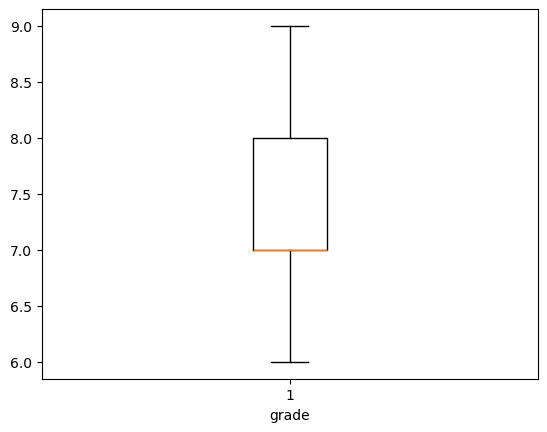

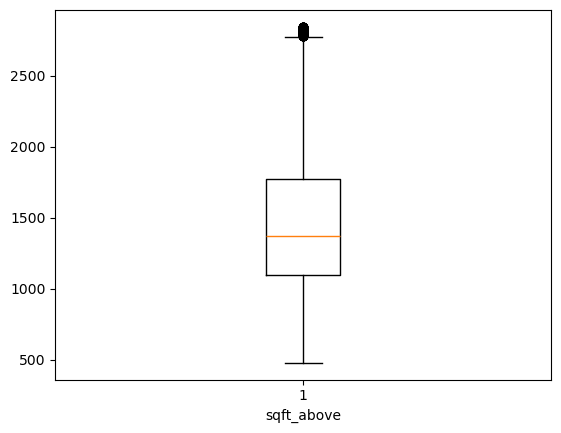

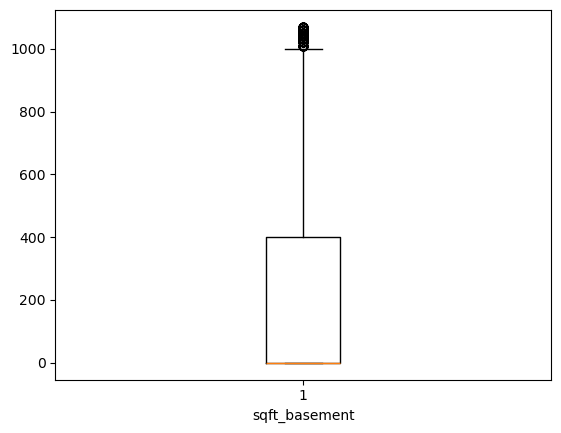

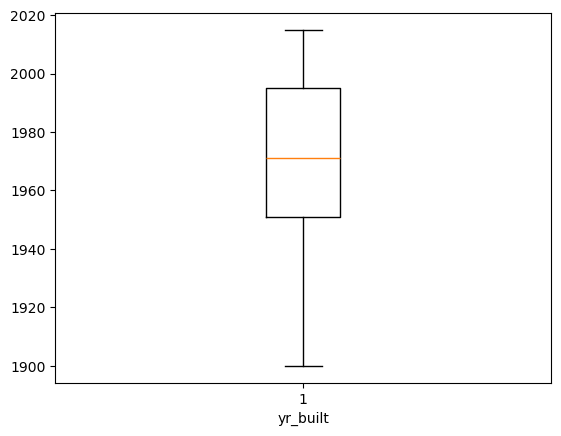

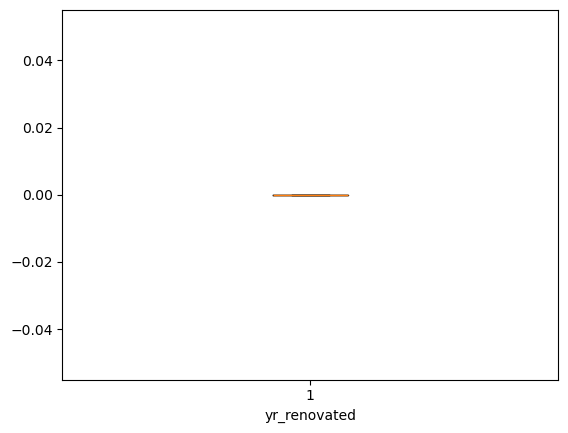

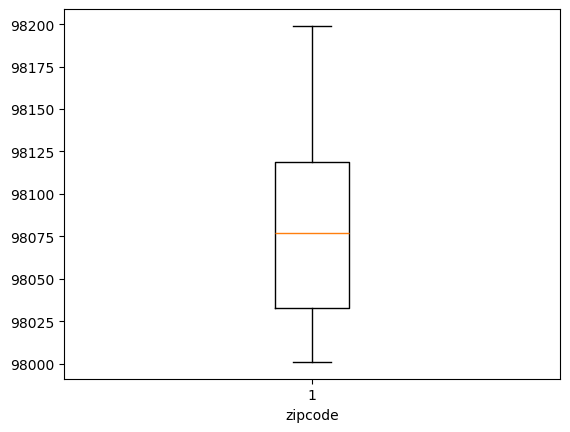

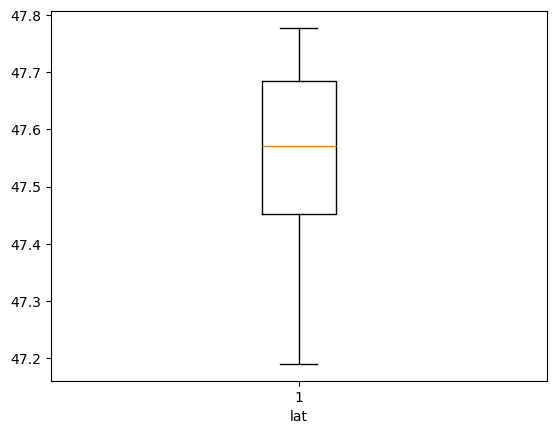

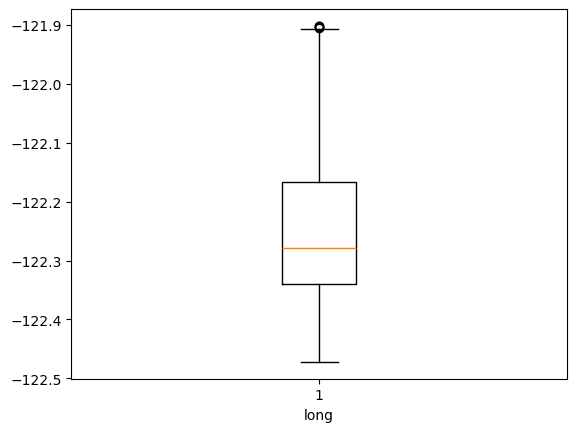

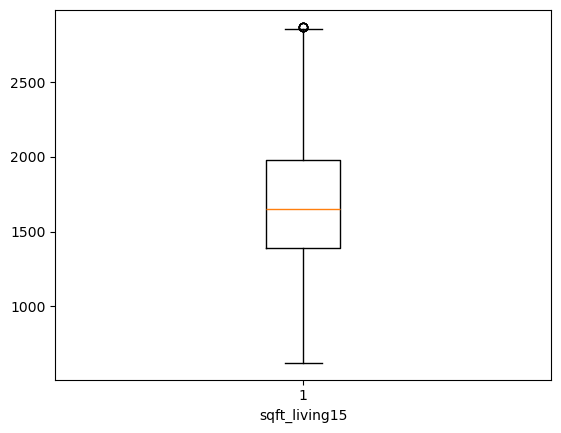

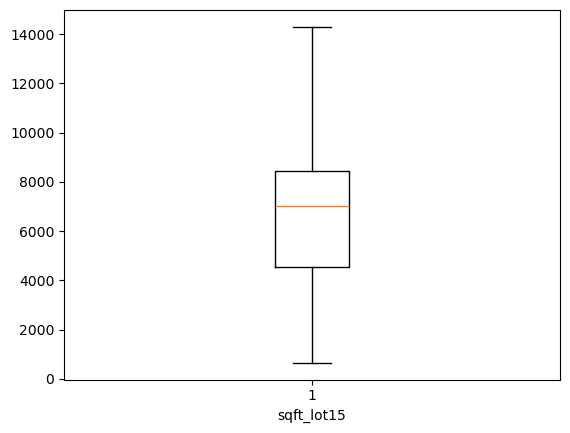

In [29]:
for x in df.columns:
    if df[x].dtypes=='object':
       continue
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.show()  

In [10]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
for x in df.columns:
    if df[x].dtypes=="object":
        df[x]=le.fit_transform(df[x])

In [12]:
df

id  date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520   163  221900         3       1.00         1180      5650   
2      5631500400   286  180000         2       1.00          770     10000   
3      2487200875   218  604000         4       3.00         1960      5000   
4      1954400510   279  510000         3       2.00         1680      8080   
6      1321400060    56  257500         3       2.25         1715      6819   
...           ...   ...     ...       ...        ...          ...       ...   
21608   263000018    19  360000         3       2.50         1530      1131   
21609  6600060120   284  400000         4       2.50         2310      5813   
21610  1523300141    52  402101         2       0.75         1020      1350   
21611   291310100   249  400000         3       2.50         1600      2388   
21612  1523300157   165  325000         2       0.75         1020      1076   

       floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0         1.0           0     0  ...      7        1180              0   
2         1.0           0     0  ...      6         770              0   
3         1.0           0     0  ...      7        1050            910   
4         1.0           0     0  ...      8        1680              0   
6         2.0           0     0  ...      7        1715              0   
...       ...         ...   ...  ...    ...         ...            ...   
21608     3.0           0     0  ...      8        1530              0   
21609     2.0           0     0  ...      8        2310              0   
21610     2.0           0     0  ...      7        1020              0   
21611     2.0           0     0  ...      8        1600              0   
21612     2.0           0     0  ...      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
6          1995             0    98003  47.3097 -122.327           2238   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
2            8062  
3            5000  
4            7503  
6            6819  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[13868 rows x 21 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13868 non-null  int64  
 1   date           13868 non-null  int32  
 2   price          13868 non-null  int64  
 3   bedrooms       13868 non-null  int64  
 4   bathrooms      13868 non-null  float64
 5   sqft_living    13868 non-null  int64  
 6   sqft_lot       13868 non-null  int64  
 7   floors         13868 non-null  float64
 8   waterfront     13868 non-null  int64  
 9   view           13868 non-null  int64  
 10  condition      13868 non-null  int64  
 11  grade          13868 non-null  int64  
 12  sqft_above     13868 non-null  int64  
 13  sqft_basement  13868 non-null  int64  
 14  yr_built       13868 non-null  int64  
 15  yr_renovated   13868 non-null  int64  
 16  zipcode        13868 non-null  int64  
 17  lat            13868 non-null  float64
 18  long       

In [14]:
#TRAINING AND TEASTING THE DATASET
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop('price',axis=1)
y=df['price']

In [16]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.25)   #train_size = 0.75

In [17]:
linear_model  = LinearRegression()

In [18]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [19]:
model_predicted = linear_model.predict(x_test)

In [20]:
model_predicted


array([532619.86088494, 371316.53045814, 485291.47354578, ...,
       304436.96364072, 446573.83454391, 386339.81298315])

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
#CHECKING MEAN SQUARED ERROR
mse = mean_squared_error(y_test,model_predicted)
mse

10805209729.332258

In [23]:
#AND ROOT MEAN SQUARED ERROR
rmse=np.sqrt(mse)
rmse

103948.11075403081

In [24]:
#CHECKING R2 SCORE
from sklearn.metrics import r2_score


In [25]:
r2_acc=r2_score(y_test,model_predicted)
r2_acc*100

63.88346308793067

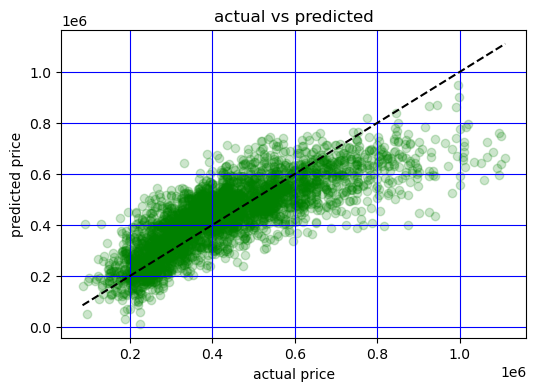

In [49]:
#PLOTTING THE LINEAR REGRESSION LINE OR BEST FIN LINE 
plt.figure(figsize=(6,4))
plt.scatter(y_test,model_predicted,alpha=0.2,color='green')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='black',linestyle='--')
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.grid(True,color='blue')
plt.show()